In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
dfAmazon = pd.read_csv (r'C:\Users\Windows 10\Desktop\Hamoye\Stage E\AmazonBooks.csv',encoding='latin-1')
dfAmazon.head()

,BookName,Type,Date,Rate
0,"The Silent Wife: A gripping, emotional page-tu...",Paperback,13-Nov-18,"18,014"
1,Online Shopping Tracker: Keep Tracking Organiz...,Paperback,26-Dec-19,11
2,"my final wishes planner: End of Life Planner, ...",Paperback,4-Mar-22,51
3,Everything You Need to Know When I'm Gone - En...,Paperback,23-Feb-19,"2,034"
4,My Password Book: Internet Address Organizer |...,Paperback,5-Jul-20,665


In [3]:
dfAmazon['Date'] = pd.to_datetime(dfAmazon['Date'])

# Changing Date column to display only year
dfAmazon['Date'] = dfAmazon['Date'].dt.strftime('%Y')

In [4]:
# Keep first duplicate row
amazonbooks = dfAmazon.drop_duplicates()
print(amazonbooks)

                                              BookName       Type  Date  \
0    The Silent Wife: A gripping, emotional page-tu...  Paperback  2018   
1    Online Shopping Tracker: Keep Tracking Organiz...  Paperback  2019   
2    my final wishes planner: End of Life Planner, ...  Paperback  2022   
3    Everything You Need to Know When I'm Gone - En...  Paperback  2019   
4    My Password Book: Internet Address Organizer |...  Paperback  2020   
..                                                 ...        ...   ...   
401  Password Book, Website Username and Password R...  Paperback  2021   
402  McGraw-Hill Education 500 Review Questions for...  Paperback  2015   
410  The Leader in Me: How Schools Around the World...  Paperback  2014   
411              PURE OF HEART - A Fantasy Adventure       Kindle  2015   
412                 Kautilyanomics: For Modern Times       Kindle  2022   

       Rate  
0    18,014  
1        11  
2        51  
3     2,034  
4       665  
..      ...  
4

In [5]:
amazonbooks.describe()

,BookName,Type,Date,Rate
count,336,336,336,336
unique,334,11,22,212
top,My Final Wishes - Everything You Need to Know ...,Paperback,2021,1
freq,2,227,85,43


In [6]:
# Remove commas from Rate columns

amazonbooks['Rate'] = amazonbooks['Rate'].str.replace(',','')
amazonbooks

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_1900\1752078076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazonbooks['Rate'] = amazonbooks['Rate'].str.replace(',','')


,BookName,Type,Date,Rate
0,"The Silent Wife: A gripping, emotional page-tu...",Paperback,2018,18014
1,Online Shopping Tracker: Keep Tracking Organiz...,Paperback,2019,11
2,"my final wishes planner: End of Life Planner, ...",Paperback,2022,51
3,Everything You Need to Know When I'm Gone - En...,Paperback,2019,2034
4,My Password Book: Internet Address Organizer |...,Paperback,2020,665
...,...,...,...,...
401,"Password Book, Website Username and Password R...",Paperback,2021,51
402,McGraw-Hill Education 500 Review Questions for...,Paperback,2015,2
410,The Leader in Me: How Schools Around the World...,Paperback,2014,606
411,PURE OF HEART - A Fantasy Adventure,Kindle,2015,294


In [7]:
amazonbooks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336 entries, 0 to 412
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   BookName  336 non-null    object
 1   Type      336 non-null    object
 2   Date      336 non-null    object
 3   Rate      336 non-null    object
dtypes: object(4)
memory usage: 13.1+ KB


In [8]:
amazonbooks['Rate'] = amazonbooks['Rate'].astype(int)

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_1900\1518260407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazonbooks['Rate'] = amazonbooks['Rate'].astype(int)


In [9]:
amazonbooks['Date'] = amazonbooks['Date'].astype(int)

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_1900\3108570318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazonbooks['Date'] = amazonbooks['Date'].astype(int)


In [10]:
amazonbooks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336 entries, 0 to 412
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   BookName  336 non-null    object
 1   Type      336 non-null    object
 2   Date      336 non-null    int32 
 3   Rate      336 non-null    int32 
dtypes: int32(2), object(2)
memory usage: 10.5+ KB


In [11]:
# Ratings by Date and Type
groupedBookType=amazonbooks.groupby([ 'Date' , 'Type']) ['Rate'].sum( ) 
print (groupedBookType)

Date  Type                 
1975  Mass Market Paperback      6433
1990  Paperback                  9348
1996  Board book                 6213
2001  Pamphlet                   7367
      Paperback                    36
2005  Hardcover                  2777
2006  Paperback                  1023
2007  Hardcover                  7076
2008  Kindle                      122
      Paperback                   601
2009  Paperback                  1246
2010  Hardcover-spiral          22753
      Kindle                      338
      Paperback                  1107
2011  Hardcover                  1371
      Kindle                        1
      Mass Market Paperback       958
2012  Hardcover                     5
      Kindle Edition               14
      Paperback                  2490
2013  Hardcover                  2565
      Kindle                      792
      Paperback                  4692
2014  Hardcover                 28099
      Hardcover-spiral           7109
      Kindle          

In [12]:
# Group by and aggregate
dataGroup = amazonbooks.groupby(['Date', 'Type']).agg(Value_max=('Rate', 'max')).reset_index()

# Sort column(s) Value_max descending
dataSort = dataGroup.sort_values(by=['Value_max'], ascending=[False])

# Group by and aggregate
RatedType = dataSort.groupby(['Type']).agg(Rate_max_max=('Value_max','max')).reset_index()

# Sort column(s) Value_max_max descending
MostRatedType = RatedType.sort_values(by=['Rate_max_max'], ascending=[False])

print(MostRatedType)

                     Type  Rate_max_max
8               Paperback        167843
4                  Kindle         91498
2               Hardcover         28091
3        Hardcover-spiral         22753
7                Pamphlet          7367
6   Mass Market Paperback          6433
0              Board book          6213
1                Calendar          1955
10           Spiral-bound           489
5          Kindle Edition            16
9       Perfect Paperback             2


In [13]:
# Group by and aggregate
dataRating = amazonbooks.groupby(['Type']).agg(Rate_sum=('Rate', 'sum')).reset_index()

# Sort column(s) Rate_sum descending (Z-A)
HighToLowRating = dataRating.sort_values(by=['Rate_sum'], ascending=[False])

HighToLowRating

,Type,Rate_sum
8,Paperback,371317
4,Kindle,269941
2,Hardcover,78544
3,Hardcover-spiral,34824
6,Mass Market Paperback,7391
7,Pamphlet,7367
0,Board book,6213
1,Calendar,3012
10,Spiral-bound,489
5,Kindle Edition,58


In [14]:
# Keep rows where (Date >= 2009) and (Date <= 2019)

NewAmazon = amazonbooks.loc[(amazonbooks['Date'] >= 2009) & (amazonbooks['Date'] <= 2019)]
NewAmazon

,BookName,Type,Date,Rate
0,"The Silent Wife: A gripping, emotional page-tu...",Paperback,2018,18014
1,Online Shopping Tracker: Keep Tracking Organiz...,Paperback,2019,11
3,Everything You Need to Know When I'm Gone - En...,Paperback,2019,2034
6,"WTF Is My Password: password book, password lo...",Paperback,2019,2540
7,"End Of Online Shopping, The: The Future Of New...",Paperback,2018,7
...,...,...,...,...
399,Lost Department Stores of Denver,Kindle,2018,16
400,Warman's Depression Glass Handbook: Identifica...,Paperback,2017,345
402,McGraw-Hill Education 500 Review Questions for...,Paperback,2015,2
410,The Leader in Me: How Schools Around the World...,Paperback,2014,606


In [15]:
# Creating a new table to keep information for 2009 to 2019

NewAmazon.to_csv(r'C:\Users\Windows 10\Desktop\Hamoye\Stage E\Books Amazon.csv', index=False)

In [16]:
NewAmazon.describe()

,Date,Rate
count,140.000000,140.000000
mean,2016.628571,3905.442857
std,2.728330,16607.962459
min,2009.000000,1.000000
25%,2015.000000,34.750000
50%,2018.000000,318.000000
75%,2019.000000,1444.750000
max,2019.000000,167843.000000


In [17]:
NewAmazon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 411
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   BookName  140 non-null    object
 1   Type      140 non-null    object
 2   Date      140 non-null    int32 
 3   Rate      140 non-null    int32 
dtypes: int32(2), object(2)
memory usage: 4.4+ KB


In [18]:
# Total Number Of Book Types In the Type Column

NumberOfType=NewAmazon['Type'].nunique()
print(NumberOfType)

7


In [19]:
# Total Number Of Years In the Date Column

NumberOfYears=NewAmazon['Date'].nunique()
print(NumberOfYears)

11


In [20]:
# Total Number Of Books In the Book Names Column

NumberOfBooks=NewAmazon['BookName'].nunique()
print(NumberOfBooks)

140


In [21]:
# Total Number Of Rows In the workbook

NumberofRows=len(NewAmazon.index)
print(NumberofRows)

140


In [22]:
# Total Number Of Times a year occured In the Date Column

YearValueCount=NewAmazon['Date'].value_counts()
print(YearValueCount)

2019    49
2018    27
2016    14
2017    11
2015     9
2014     8
2013     8
2010     5
2012     4
2011     3
2009     2
Name: Date, dtype: int64


In [23]:
# Total number of rating in the Rate Column

TotalRating=sum(NewAmazon['Rate'])
TotalRating

546762

In [24]:
# Total Number Of Times A Rating occured In the Rate Column

RatingValueCount=NewAmazon['Rate'].value_counts()
print(RatingValueCount)

1       7
16      4
8       4
7       4
28      3
       ..
4962    1
6968    1
1402    1
77      1
294     1
Name: Rate, Length: 118, dtype: int64


In [25]:
# Book Name that had the rating 1

# Drop columns
ratingOneCal = NewAmazon.drop(columns=['Type'])

# Keep rows where Rate == 1
ratingOne = ratingOneCal.loc[amazonbooks['Rate'] == 1]
print(ratingOne)

                                              BookName  Date  Rate
26   Online Shopping Tracker: Tracking Organizer No...  2019     1
82   Christmas Planner: Festive Organiser : Plan an...  2019     1
103  Online Shopping Tracker: Keep Tracking Organiz...  2019     1
121  Christmas Planner: Christmas Shopping & Online...  2019     1
173  Christmas Planner & Diary: Notebook Journal wi...  2019     1
268  Amazon and the Rise of E-commerce: The story o...  2017     1
284  Beyond Amazon: Shopping for the Absolute Lowes...  2011     1


In [26]:
# Ratings by year and type

groupedBookYear=NewAmazon.groupby([ 'Date' , 'Type']) ['Rate'].sum( ) 
print (groupedBookYear)

Date  Type                 
2009  Paperback                  1246
2010  Hardcover-spiral          22753
      Kindle                      338
      Paperback                  1107
2011  Hardcover                  1371
      Kindle                        1
      Mass Market Paperback       958
2012  Hardcover                     5
      Kindle Edition               14
      Paperback                  2490
2013  Hardcover                  2565
      Kindle                      792
      Paperback                  4692
2014  Hardcover                 28099
      Hardcover-spiral           7109
      Kindle                        8
      Paperback                  3134
2015  Hardcover                 15527
      Kindle                    91852
      Paperback                  4186
2016  Hardcover-spiral           4962
      Kindle                       62
      Paperback                225956
2017  Kindle                       60
      Paperback                 18944
2018  Hardcover       

In [27]:
# Type of book with the highest rating

# Group by and aggregate
HighrateCal = NewAmazon.groupby(['Type']).agg(Rate_sum=('Rate', 'sum')).reset_index()

# Sort column(s) Rate_sum descending
HighestRating = HighrateCal.sort_values(by=['Rate_sum'], ascending=[False])
HighestRating


,Type,Rate_sum
6,Paperback,337128
3,Kindle,114216
1,Hardcover,57648
2,Hardcover-spiral,34824
0,Calendar,1955
5,Mass Market Paperback,958
4,Kindle Edition,33


In [28]:
# Type of book with the lowest rating

LowrateCal = NewAmazon.groupby(['Type']).agg(Rate_sum=('Rate', 'sum')).reset_index()

LowestRating = LowrateCal.sort_values(by=['Rate_sum'], ascending=[True])
LowestRating

,Type,Rate_sum
4,Kindle Edition,33
5,Mass Market Paperback,958
0,Calendar,1955
2,Hardcover-spiral,34824
1,Hardcover,57648
3,Kindle,114216
6,Paperback,337128


In [29]:
# Select columns
rating = NewAmazon[['Date', 'Rate']]

# Group by and aggregate
totalRate = rating.groupby(['Date']).agg(Rate_sum=('Rate', 'sum')).reset_index()

totalRate

,Date,Rate_sum
0,2009,1246
1,2010,24198
2,2011,2330
3,2012,2509
4,2013,8049
5,2014,38350
6,2015,111565
7,2016,230980
8,2017,19004
9,2018,51771


In [30]:
# Sort the data starting with rows with the biggest values

totalRateBiggerValues = totalRate.sort_values(by=['Rate_sum'], ascending=[False])
totalRateBiggerValues


,Date,Rate_sum
7,2016,230980
6,2015,111565
10,2019,56760
9,2018,51771
5,2014,38350
1,2010,24198
8,2017,19004
4,2013,8049
3,2012,2509
2,2011,2330


In [31]:
# Sort the data starting with rows with the biggest values

RatedBiggerValues = NewAmazon.sort_values(by=['Rate'], ascending=[False])
RatedBiggerValues.head(30)

,BookName,Type,Date,Rate
20,It Ends with Us: A Novel (1),Paperback,2016,167843
233,Harry Potter: The Complete Collection (1-7),Kindle,2015,91498
93,The Complete Ketogenic Diet for Beginners: You...,Paperback,2016,28699
348,The Life-Changing Magic of Tidying Up: The Jap...,Hardcover,2014,28091
35,The Personal Internet Address & Password Logbo...,Hardcover-spiral,2010,22753
281,Drift (Rachel Hatch Book 1),Kindle,2019,18548
0,"The Silent Wife: A gripping, emotional page-tu...",Paperback,2018,18014
145,The Complete Mediterranean Cookbook: 500 Vibra...,Paperback,2016,16771
104,The Whole30: The 30-Day Guide to Total Health ...,Hardcover,2015,15527
109,The Plant Paradox Quick and Easy: The 30-Day P...,Paperback,2019,9228


In [32]:
# Sort the data starting with rows with the smallest values

RatedSmallerValues = NewAmazon.sort_values(by=['Rate'], ascending=[True])
RatedSmallerValues.head(30)

,BookName,Type,Date,Rate
173,Christmas Planner & Diary: Notebook Journal wi...,Paperback,2019,1
284,Beyond Amazon: Shopping for the Absolute Lowes...,Kindle,2011,1
82,Christmas Planner: Festive Organiser : Plan an...,Paperback,2019,1
103,Online Shopping Tracker: Keep Tracking Organiz...,Paperback,2019,1
268,Amazon and the Rise of E-commerce: The story o...,Kindle,2017,1
121,Christmas Planner: Christmas Shopping & Online...,Paperback,2019,1
26,Online Shopping Tracker: Tracking Organizer No...,Paperback,2019,1
402,McGraw-Hill Education 500 Review Questions for...,Paperback,2015,2
171,The Absolute Guide to Online Shopping: PLUS 10...,Kindle,2016,2
270,How To Purchase Products From 1688.com Without...,Paperback,2019,3


In [33]:
#0.25 quantile
qgroupAmazon=NewAmazon.groupby('Type').quantile(0.25)
print(qgroupAmazon)

                         Date     Rate
Type                                  
Calendar               2019.0  1955.00
Hardcover              2013.0    77.00
Hardcover-spiral       2012.0  6035.50
Kindle                 2014.0     8.00
Kindle Edition         2015.0     8.50
Mass Market Paperback  2011.0   958.00
Paperback              2016.0   123.75


C:\Users\Windows 10\AppData\Local\Temp\ipykernel_1900\4274132680.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  qgroupAmazon=NewAmazon.groupby('Type').quantile(0.25)


In [34]:
# 0.75 quantile
qgroupAmazon1=NewAmazon.groupby('Type').quantile(0.75)
print(qgroupAmazon1)

                         Date      Rate
Type                                   
Calendar               2019.0   1955.00
Hardcover              2018.0   2531.00
Hardcover-spiral       2015.0  14931.00
Kindle                 2018.0     69.00
Kindle Edition         2018.5     15.00
Mass Market Paperback  2011.0    958.00
Paperback              2019.0   1466.25


C:\Users\Windows 10\AppData\Local\Temp\ipykernel_1900\934705552.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  qgroupAmazon1=NewAmazon.groupby('Type').quantile(0.75)


In [35]:
# Histogram to show book type and the sum of ratings
fig1 = px.histogram(RatedBiggerValues, x='Type', y='Rate', title='Book Types Rating From 2009 to 2019')
fig1

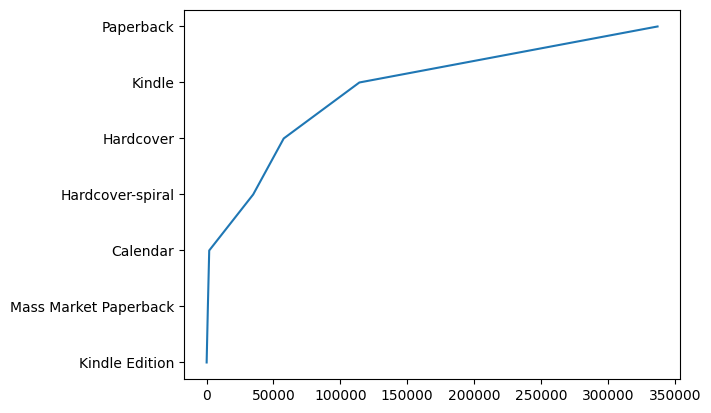

In [36]:
# Plot to show rating for book types from lowest to highest

fig2=plt.plot(LowestRating['Rate_sum'], LowestRating['Type'])
plt.show(fig2)

In [37]:
# Box to show book type and the sum of ratings
fig3 = px.box(RatedBiggerValues, x='Type', y='Rate', title='Book Types Rating')
fig3

In [38]:
fig4 = px.scatter(totalRate, x='Date', y='Rate_sum', color='Date', trendline='ols', title='Rating Trend Over 11 Year Period')
fig4

In [39]:
fig5 = px.box(NewAmazon, x='Date', y='Rate', title='Sum of Book Ratings and Year')
fig5

In [40]:
fig6 = px.line(HighestRating.sort_values(by=['Type'], ascending=[True]), x='Type', y='Rate_sum', title='Book Rating Trend')
fig6

In [41]:
def plot_boxplot(dataframe, columns):
    NewAmazon.boxplot(column=[columns])
    plt.grid(False)
    plt.show()

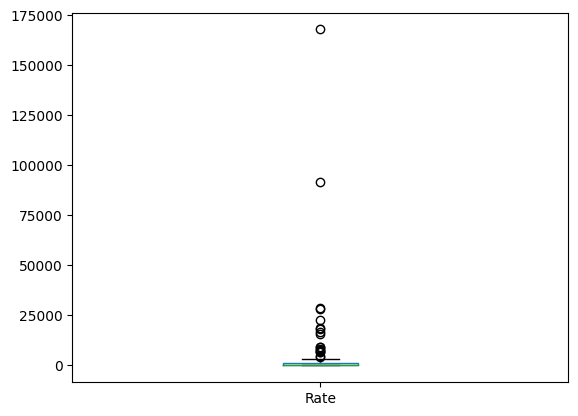

In [44]:
fig7=plot_boxplot(NewAmazon, 'Rate')
fig7

In [43]:
fig8 = px.scatter_matrix(totalRate)
fig8